<a href="https://colab.research.google.com/github/KaiAlan/ML_Notebooks/blob/Ml_tryl/Graph_Walking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Graph Walking - Random Walk

#Traversing the Graph through the connected nodes

Random Walk is a technique to extract sequence from a graph from any random node perspective. It is used to train the skip-gram model tp learn node embeddings.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
edge_labels = {
    ('A', 'B'): 'e1', ('A', 'C'): 'e2', ('B', 'D'): 'e3', ('C', 'E'): 'e4', ('C', 'F'): 'e5',
     ('E', 'F'): 'e6', ('D', 'F'): 'e7',
     ('B', 'B'): 'e8', ('F', 'F'): 'e9'
}

all_edges = (
    [('A', 'B'), ('A', 'C'), ('B', 'D'), ('C', 'E'), ('C', 'F'),
     ('E', 'F'), ('D', 'F'),
     ('B', 'B'), ('F', 'F')]
)

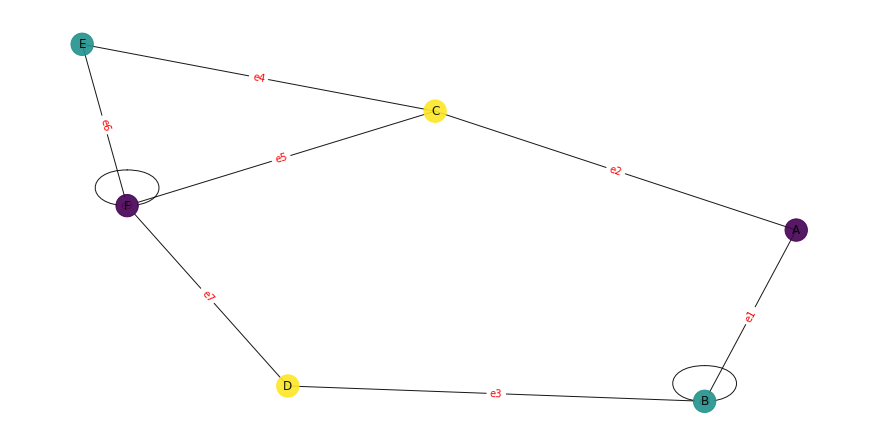

False
False


In [4]:
#G = nx.DIGraph() # for Laplacian Matrix you can not use the Directed Graph
G = nx.Graph()
G.add_edges_from(all_edges)

val_map = {'A': 1.0,
           'B': 2.0,
           'C': 3.0,
           'D': 3.0, 'E': 2.0, 'F': 1.0}

values = [val_map.get(node, 0.25) for node in G.nodes()]

pos = nx.spring_layout(G)
plt.figure(figsize = (12, 6))
nx.draw(
    G, pos, edge_color = 'black', width = 1, linewidths = 1,
    node_size = 500, node_color = values, alpha = 0.9,
    labels = {node: node for node in G.nodes()}
)
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels = edge_labels,
    font_color = 'red'
)

plt.axis('off')
plt.show()
print(nx.is_weighted(G))
print(nx.is_directed(G))


In [13]:
import random
def get_randomwalk(graph_val,node, path_length):

  random_walk = [node]

  for i in range(path_length-1):
    temp = list(graph_val.neighbors(node))
    temp = list(set(temp) - set(random_walk))
    if len(temp) == 0:
      break

    random_node = random.choice(temp)
    random_walk.append(random_node)
    node = random_node

  return random_walk

In [23]:
get_randomwalk(G, 'E', 3)

['E', 'C', 'F']

In [27]:
from tqdm import tqdm
# get list of all the nodes from the graph
all_nodes = list(G.nodes())

random_walks = []
for n in tqdm(all_nodes):
  for i in range(3):
    random_walks.append(get_randomwalk(G, n, i))

# count of sequence
len(random_walks)

100%|██████████| 6/6 [00:00<00:00, 23003.50it/s]


18